# **Hypothesis testing**

H₀: There is a significant difference in expenditures between days.

H₁: There is no significant difference in expenditures between days.

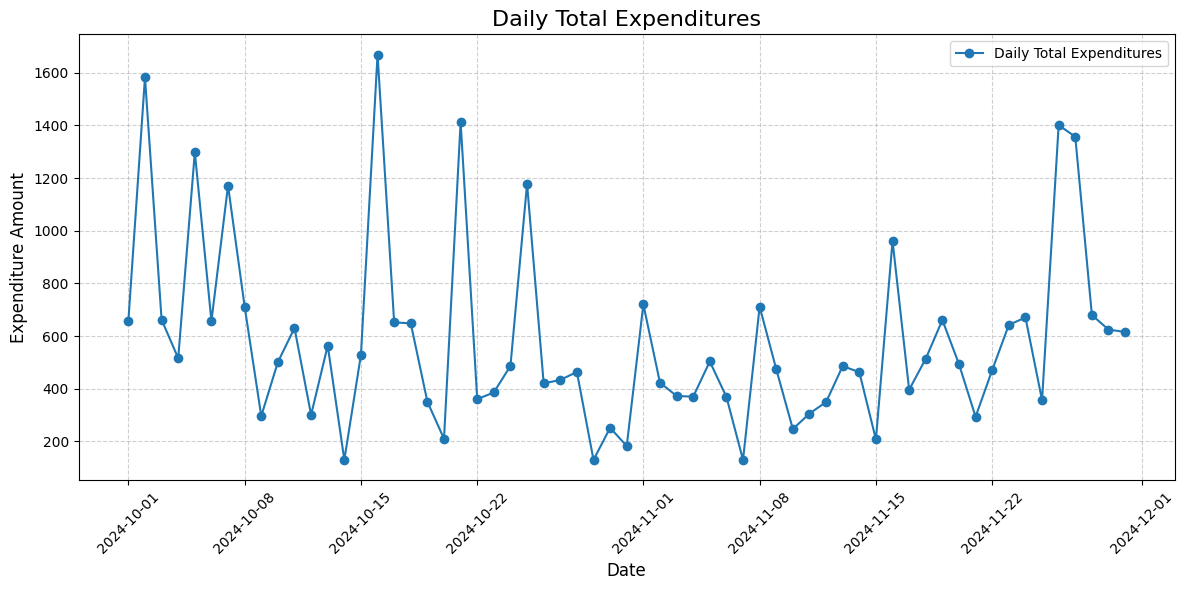

ANOVA Test Result:
F-statistic: 0.8108
P-value: 0.5662
Conclusion: There is no significant difference in expenditures between days.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway

file_path = 'iki_aylik_harcamalar_kuruslu_duzenli.xlsx'
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y')

daily_totals = df.groupby('Tarih')['Ücret'].sum()

daily_totals_df = daily_totals.reset_index()
daily_totals_df['Day'] = daily_totals_df['Tarih'].dt.day_name()

plt.figure(figsize=(12, 6))
plt.plot(daily_totals_df['Tarih'], daily_totals_df['Ücret'], marker='o', linestyle='-', label='Daily Total Expenditures')
plt.title('Daily Total Expenditures', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Expenditure Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

daily_groups = daily_totals_df.groupby('Day')['Ücret'].apply(list)
anova_result = f_oneway(*daily_groups)

print("ANOVA Test Result:")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Conclusion: There is a significant difference in expenditures between days.")
else:
    print("Conclusion: There is no significant difference in expenditures between days.")


# **Money spending histogram**
This chart shows spending ranges and frequencies

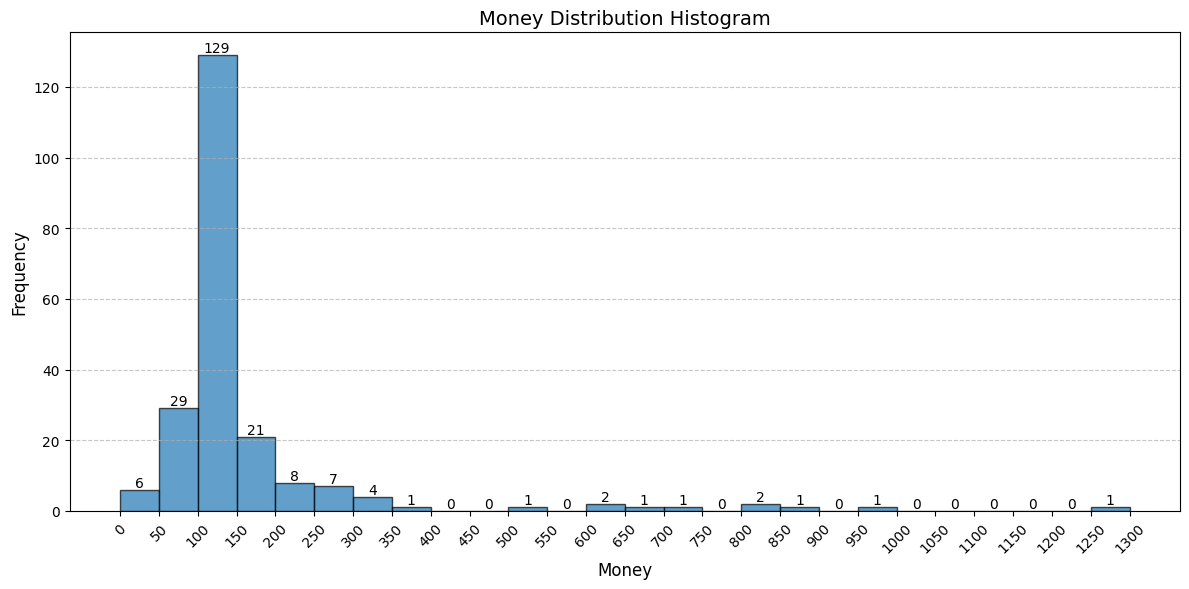

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'iki_aylik_harcamalar_kuruslu_duzenli.xlsx'
df = pd.read_excel(file_path)

df['Ücret'] = pd.to_numeric(df['Ücret'], errors='coerce')

bin_size = 50
bin_start = 0
bins = np.arange(bin_start, df['Ücret'].max() + bin_size, bin_size)

plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(df['Ücret'].dropna(), bins=bins, edgecolor='k', alpha=0.7)

for count, x in zip(n, bins[:-1]):
    plt.text(x + bin_size / 2, count, str(int(count)),
             ha='center', va='bottom', fontsize=10, color='black')

x_ticks = np.arange(bin_start, df['Ücret'].max() + bin_size, bin_size)
plt.xticks(x_ticks, rotation=45, fontsize=10)

plt.title('Money Distribution Histogram', fontsize=14)
plt.xlabel('Money', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


# **Weekly Expenditure chart**

This chart shows how much money I spent in total each week over a 2-month period.

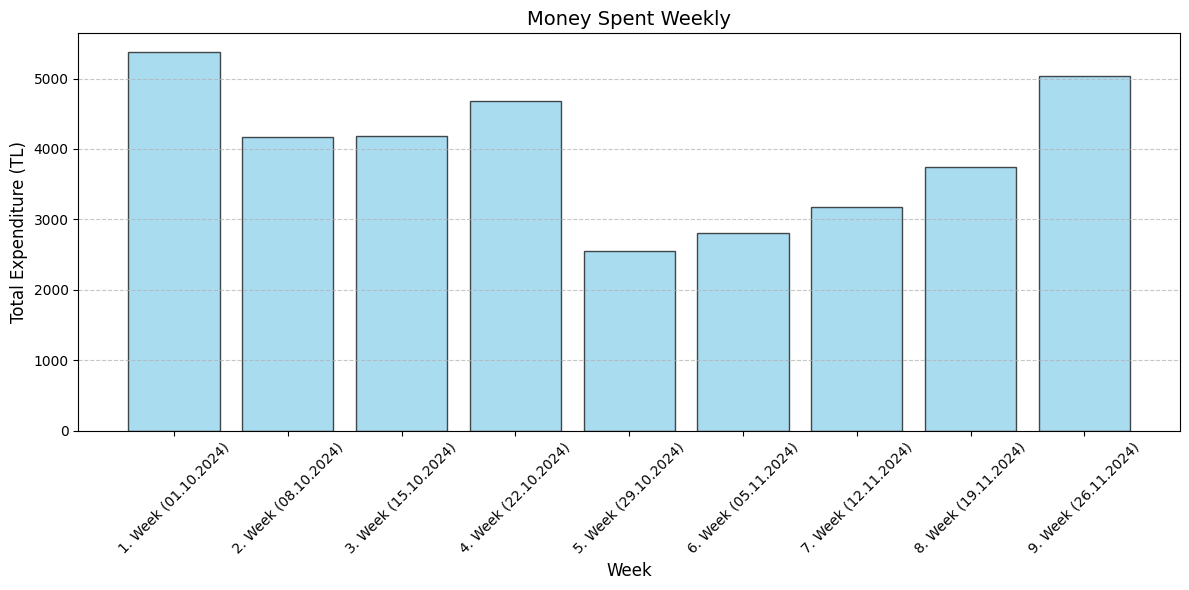

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'iki_aylik_harcamalar_kuruslu_duzenli.xlsx'
df = pd.read_excel(file_path)

df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y', errors='coerce')

df['Hafta'] = df['Tarih'].dt.to_period('W').apply(lambda r: r.start_time + pd.Timedelta(days=1))
weekly_spending = df.groupby('Hafta')['Ücret'].sum().reset_index()

weekly_spending['Adjusted Hafta'] = range(1, len(weekly_spending) + 1)

plt.figure(figsize=(12, 6))
plt.bar(weekly_spending['Adjusted Hafta'], weekly_spending['Ücret'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Money Spent Weekly', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Expenditure (TL)', fontsize=12)

plt.xticks(weekly_spending['Adjusted Hafta'],
           labels=[f"{i}. Week ({d.strftime('%d.%m.%Y')})" for i, d in zip(weekly_spending['Adjusted Hafta'], weekly_spending['Hafta'])],
           rotation=45, fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Percentage representation of my total monthly expenses**



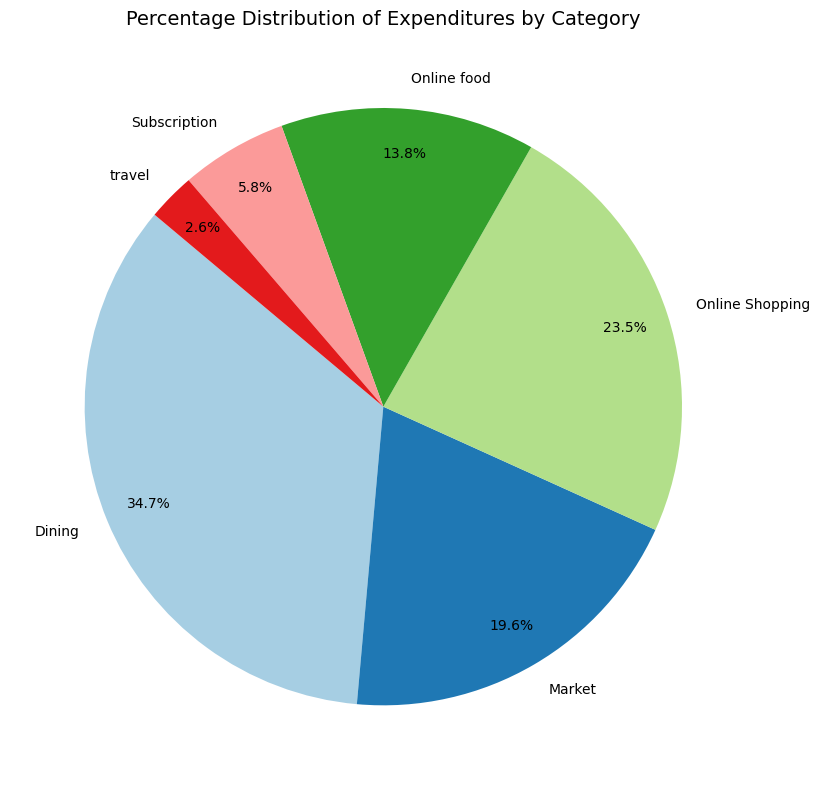

      Expense Name  Percentage (%)
0           Dining       34.698089
1           Market       19.646715
2  Online Shopping       23.523939
3      Online food       13.778747
4     Subscription        5.766108
5           travel        2.586402


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'iki_aylik_harcamalar_kuruslu_duzenli.xlsx'
df = pd.read_excel(file_path)

df.rename(columns={
    'Tarih': 'Date',
    'Harcama İsmi': 'Expense Name',
    'Ücret': 'Amount'
}, inplace=True)

expense_translation = {
    'Market': 'Market',
    'Yemek': 'Dining',
    'Online Alışveriş': 'Online Shopping',
    'Abonelik':'Subscription',
    'Seyahat':'travel',
    'Online Yemek':'Online food'
}
df['Expense Name'] = df['Expense Name'].map(expense_translation)

category_spending = df.groupby('Expense Name')['Amount'].sum()
category_spending_percentage = (category_spending / category_spending.sum()) * 100

category_spending_percentage_df = category_spending_percentage.reset_index()
category_spending_percentage_df.columns = ['Expense Name', 'Percentage (%)']

plt.figure(figsize=(10, 8))
category_spending_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140,
                                   colors=plt.cm.Paired.colors, pctdistance=0.85)
plt.title('Percentage Distribution of Expenditures by Category', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

print(category_spending_percentage_df)


# **My weekly online food orders**

The dates below indicate the start of the week.

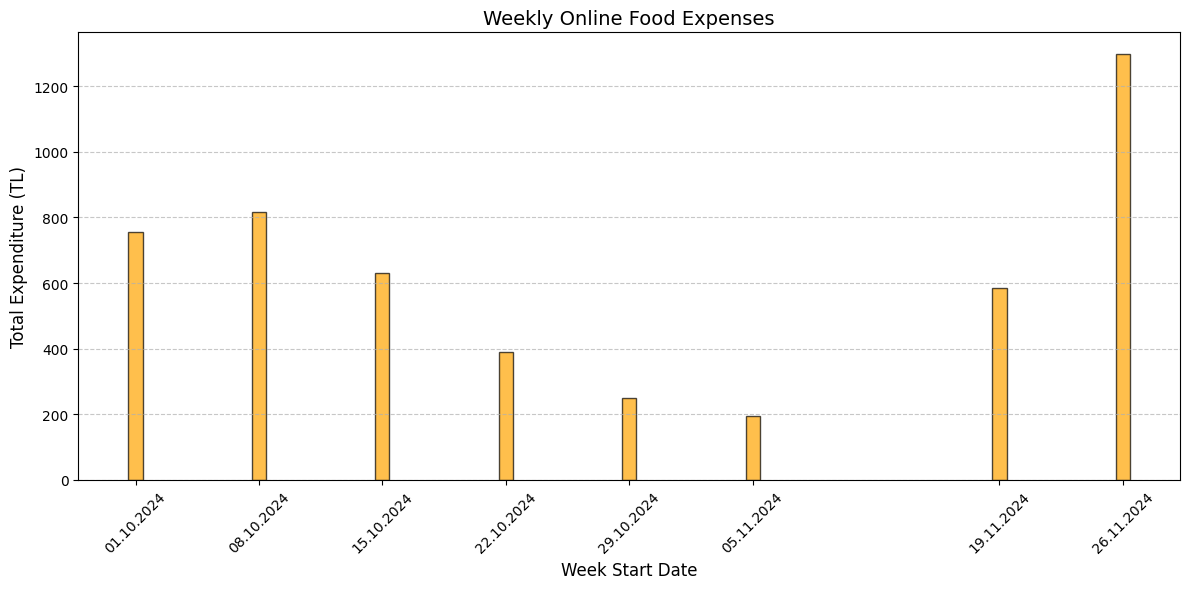

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'iki_aylik_harcamalar_kuruslu_duzenli.xlsx'
df = pd.read_excel(file_path)

df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y', errors='coerce')

df['Hafta'] = df['Tarih'].dt.to_period('W').apply(lambda r: r.start_time + pd.Timedelta(days=1))

online_food_orders = df[df['Harcama İsmi'] == 'Online Yemek']

weekly_online_food_spending = online_food_orders.groupby('Hafta')['Ücret'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(weekly_online_food_spending['Hafta'], weekly_online_food_spending['Ücret'], color='orange', edgecolor='black', alpha=0.7)
plt.title('Weekly Online Food Expenses', fontsize=14)
plt.xlabel('Week Start Date', fontsize=12)
plt.ylabel('Total Expenditure (TL)', fontsize=12)
plt.xticks(weekly_online_food_spending['Hafta'],
           labels=weekly_online_food_spending['Hafta'].dt.strftime('%d.%m.%Y'), rotation=45, fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Spending data for the week before and after my exam is over**

Data of my online shopping, travel and online food expenditures 7 days before and 7 days after the end of my 1st midterms (23.11.2024).

<Figure size 1400x800 with 0 Axes>

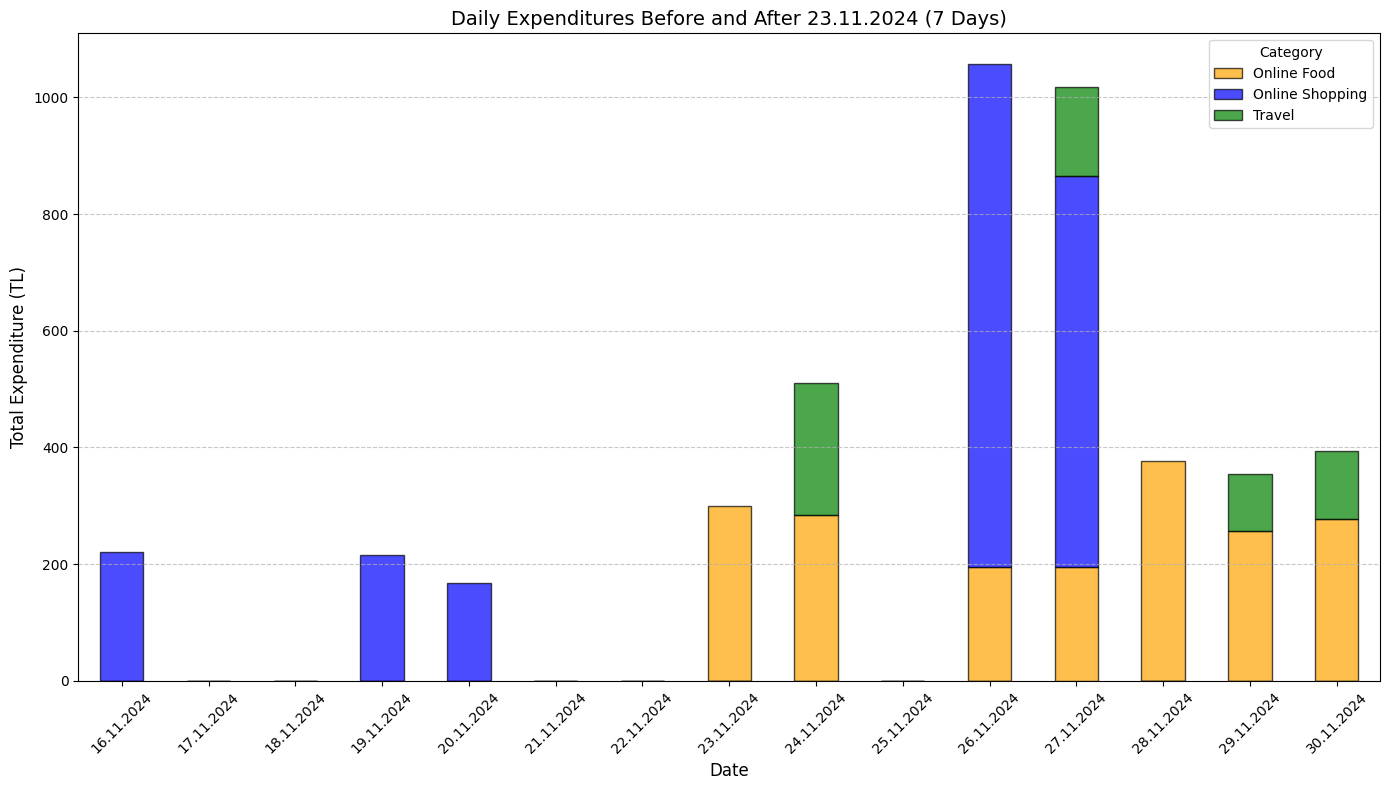

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'iki_aylik_harcamalar_kuruslu_duzenli.xlsx'
df = pd.read_excel(file_path)

df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y', errors='coerce')

category_translation = {
    'Online Yemek': 'Online Food',
    'Online Alışveriş': 'Online Shopping',
    'Seyahat': 'Travel'
}
df['Harcama İsmi'] = df['Harcama İsmi'].map(category_translation)

target_date = pd.Timestamp('2024-11-23')
start_date = target_date - pd.Timedelta(days=7)
end_date = target_date + pd.Timedelta(days=7)

selected_categories = ['Online Food', 'Online Shopping', 'Travel']
filtered_data = df[(df['Tarih'] >= start_date) & (df['Tarih'] <= end_date) & (df['Harcama İsmi'].isin(selected_categories))]

daily_category_spending = filtered_data.groupby(['Tarih', 'Harcama İsmi'])['Ücret'].sum().unstack(fill_value=0)
all_dates = pd.date_range(start=start_date, end=end_date)
daily_category_spending = daily_category_spending.reindex(all_dates, fill_value=0)

plt.figure(figsize=(14, 8))
daily_category_spending.plot(kind='bar', stacked=True, color=['orange', 'blue', 'green'], edgecolor='black', alpha=0.7, figsize=(14, 8))

plt.title('Daily Expenditures Before and After 23.11.2024 (7 Days)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Expenditure (TL)', fontsize=12)
plt.xticks(range(len(daily_category_spending.index)), daily_category_spending.index.strftime('%d.%m.%Y'), rotation=45, fontsize=10)
plt.legend(title='Category', fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Correlation Matrix between categories on a weekly basis:**

Weekly Transaction Number Increase Inter-Category Correlation Matrix. Categories: Online dining, online shopping and travel. (not in quantity but in number of transactions)

In [ ]:
import pandas as pd

file_path = 'iki_aylik_harcamalar_kuruslu_duzenli.xlsx'

df = pd.read_excel(file_path)

df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y', errors='coerce')

category_translation = {
    'Online Yemek': 'Online Food',
    'Online Alışveriş': 'Online Shopping',
    'Seyahat': 'Travel'
}

df['Harcama İsmi'] = df['Harcama İsmi'].map(category_translation)

november_data = df[(df['Tarih'].dt.month == 11) & (df['Tarih'].dt.year == 2024)]

selected_categories = ['Online Food', 'Online Shopping', 'Travel']
november_data = november_data[november_data['Harcama İsmi'].isin(selected_categories)]

november_data['Week'] = november_data['Tarih'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_transaction_counts = november_data.groupby(['Week', 'Harcama İsmi']).size().unstack(fill_value=0)

weekly_transaction_changes = weekly_transaction_counts.diff().fillna(0)

weekly_transaction_correlation_matrix = weekly_transaction_changes.corr()

formatted_correlation_matrix = weekly_transaction_correlation_matrix.round(2)

formatted_correlation_matrix.index.name = "Category"
formatted_correlation_matrix.columns.name = "Category"

print("Weekly Transaction Number Increase Correlation Matrix between Categories:")
print(formatted_correlation_matrix.to_string())


Weekly Transaction Number Increase Correlation Matrix between Categories:
Category         Online Food  Online Shopping  Travel
Category                                             
Online Food             1.00            -0.67    0.97
Online Shopping        -0.67             1.00   -0.75
Travel                  0.97            -0.75    1.00


# **Linear regression of the relationship between total daily transaction numbers and total spending**

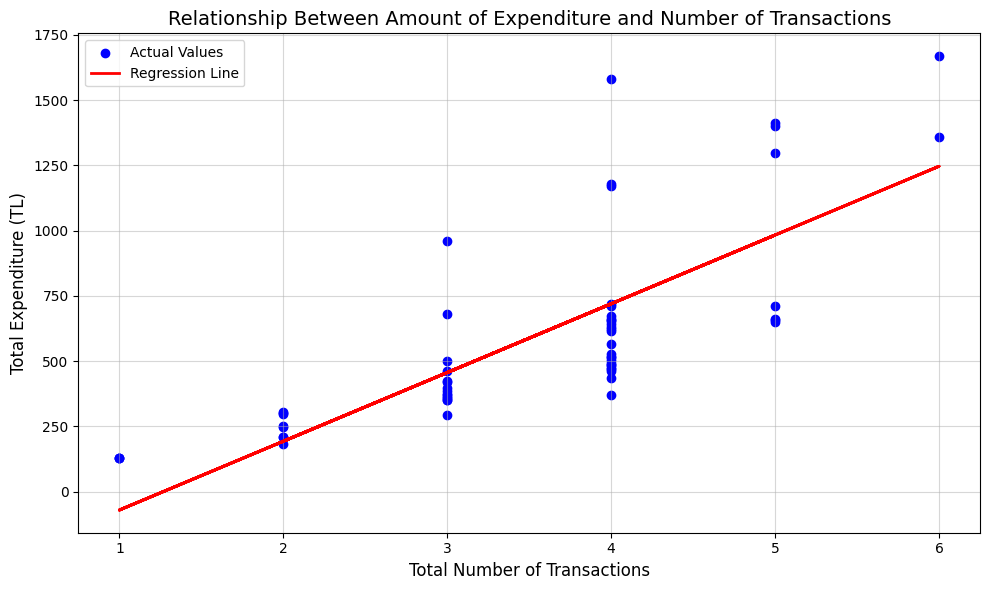

Mean Squared Error: 44218.57849690846
R-squared: 0.06877857366833262


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'iki_aylik_harcamalar_kuruslu_duzenli.xlsx'
df = pd.read_excel(file_path)

df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y', errors='coerce')

daily_data = df.groupby(['Tarih', 'Harcama İsmi']).agg(
    Transaction_Count=('Ücret', 'size'),
    Total_Spending=('Ücret', 'sum')
).reset_index()

daily_totals = daily_data.groupby('Tarih').agg(
    Total_Transactions=('Transaction_Count', 'sum'),
    Total_Spending=('Total_Spending', 'sum')
).reset_index()

X = daily_totals[['Total_Transactions']].values
y = daily_totals['Total_Spending'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(daily_totals['Total_Transactions'], daily_totals['Total_Spending'], color='blue', label='Actual Values')
plt.plot(daily_totals['Total_Transactions'], model.predict(daily_totals[['Total_Transactions']].values),
         color='red', linewidth=2, label='Regression Line')
plt.title('Relationship Between Amount of Expenditure and Number of Transactions', fontsize=14)
plt.xlabel('Total Number of Transactions', fontsize=12)
plt.ylabel('Total Expenditure (TL)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# **Regression analysis of daily expenses**

It creates a meaningful regression analysis graph by showing the total amount of expenditure made every day for a 2-month period.

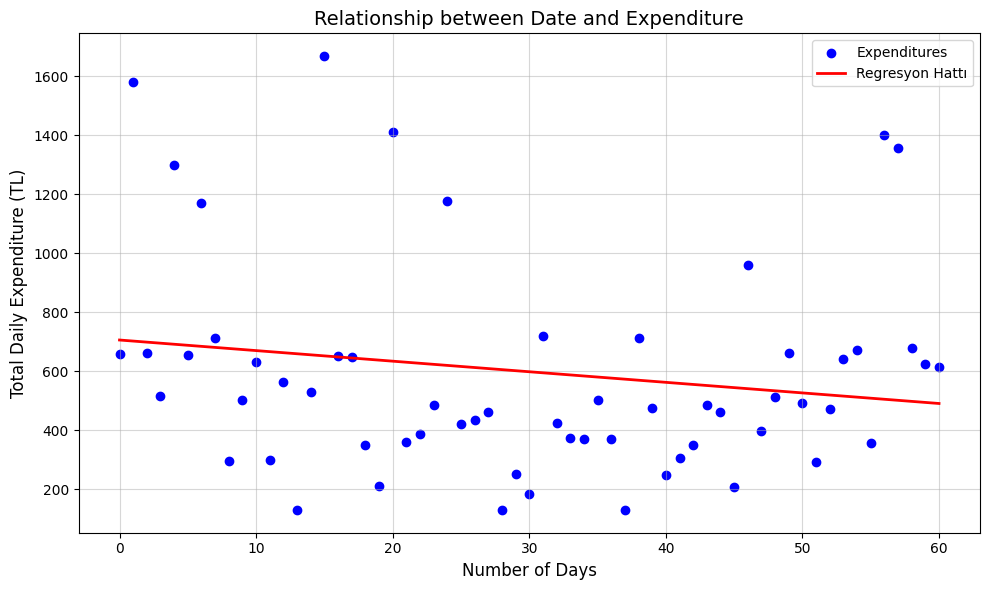

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'iki_aylik_harcamalar_kuruslu_duzenli.xlsx'
df = pd.read_excel(file_path)

df['Tarih'] = pd.to_datetime(df['Tarih'], format='%d.%m.%Y', errors='coerce')

daily_spending = df.groupby('Tarih')['Ücret'].sum().reset_index()

daily_spending['Tarih_Num'] = (daily_spending['Tarih'] - daily_spending['Tarih'].min()).dt.days

X = daily_spending[['Tarih_Num']].values
y = daily_spending['Ücret'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

daily_spending['Predicted_Spending'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(daily_spending['Tarih_Num'], daily_spending['Ücret'], color='blue', label='Expenditures')
plt.plot(daily_spending['Tarih_Num'], daily_spending['Predicted_Spending'], color='red', linewidth=2, label='Regresyon Hattı')
plt.title('Relationship between Date and Expenditure', fontsize=14)
plt.xlabel('Number of Days', fontsize=12)
plt.ylabel('Total Daily Expenditure (TL)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()



# **Intensity of the relationship between market expenditures and food expenditures**

**Density Regions:**
Warmer colors (shades of red/orange) represent regions where spending occurs more frequently.
Cooler colors (shades of purple) indicate regions where spending is less frequent.

**Correlation:** Visualizes whether there is a strong relationship between grocery and food spending.

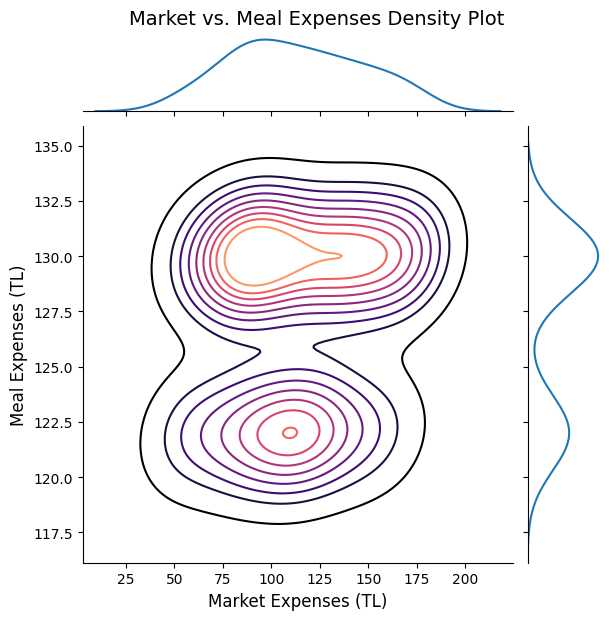

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'iki_aylik_harcamalar_kuruslu_duzenli.xlsx'
df = pd.ExcelFile(file_path).parse('Sheet1')

market_data = pd.to_numeric(df[df['Harcama İsmi'] == 'Market']['Ücret'], errors='coerce').dropna()
meal_data = pd.to_numeric(df[df['Harcama İsmi'] == 'Yemek']['Ücret'], errors='coerce').dropna()

min_length = min(len(market_data), len(meal_data))
combined_data = pd.DataFrame({
    'Market Expenses': market_data.iloc[:min_length].values,
    'Meal Expenses': meal_data.iloc[:min_length].values
})

g = sns.jointplot(
    data=combined_data,
    x='Market Expenses',
    y='Meal Expenses',
    kind='kde',
    cmap='magma'
)

g.set_axis_labels("Market Expenses (TL)", "Meal Expenses (TL)", fontsize=12)
plt.suptitle("Market vs. Meal Expenses Density Plot", y=1.02, fontsize=14)

plt.show()
